DataFrame:
          A         B       Date
0  0.493296  0.349919 2023-01-01
1  0.820551  0.931228 2023-01-02
2  0.455486  0.320056 2023-01-03
3  0.013439  0.169224 2023-01-04
4  0.873348  0.401388 2023-01-05
5  0.889670  0.476849 2023-01-06
6  0.567434  0.455459 2023-01-07
7  0.573464  0.865164 2023-01-08
8  0.519063  0.979470 2023-01-09
9  0.927248  0.103595 2023-01-10

DataFrame with Days_Since:
          A         B       Date  Days_Since
0  0.493296  0.349919 2023-01-01           9
1  0.820551  0.931228 2023-01-02           8
2  0.455486  0.320056 2023-01-03           7
3  0.013439  0.169224 2023-01-04           6
4  0.873348  0.401388 2023-01-05           5
5  0.889670  0.476849 2023-01-06           4
6  0.567434  0.455459 2023-01-07           3
7  0.573464  0.865164 2023-01-08           2
8  0.519063  0.979470 2023-01-09           1
9  0.927248  0.103595 2023-01-10           0


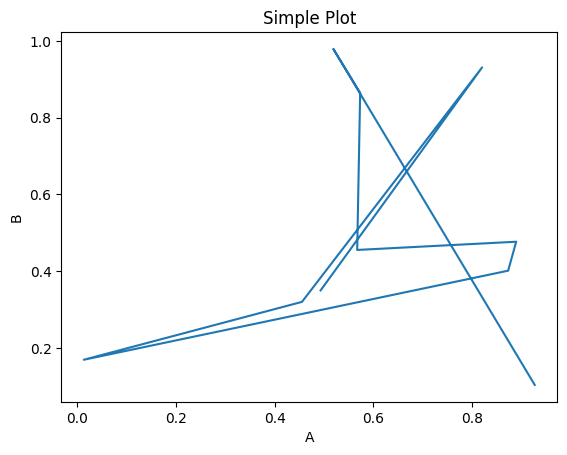

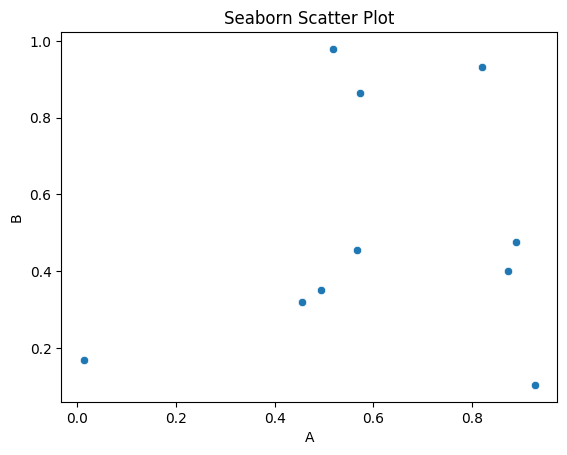


Estadísticas descriptivas:
Mean of A: 0.6132998233226767
Standard Deviation of A: 0.2640515011732558
T-Statistic: 1.2872468759229176, P-Value: 0.23012533742085745

Resumen del modelo de regresión:
                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.099
Method:                 Least Squares   F-statistic:                    0.1917
Date:                Sat, 06 Jul 2024   Prob (F-statistic):              0.673
Time:                        21:22:18   Log-Likelihood:                -1.9337
No. Observations:                  10   AIC:                             7.867
Df Residuals:                       8   BIC:                             8.473
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
            

c:\Users\pablo\myenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Crear un DataFrame simple
data = {
    'A': np.random.rand(10),
    'B': np.random.rand(10),
    'Date': pd.date_range(start='2023-01-01', periods=10)
}
df = pd.DataFrame(data)

# Mostrar el DataFrame
print("DataFrame:")
print(df)

# Usar datetime para trabajar con fechas
df['Date'] = pd.to_datetime(df['Date'])
today = pd.Timestamp('2023-01-10')
df['Days_Since'] = (today - df['Date']).dt.days

print("\nDataFrame with Days_Since:")
print(df)

# Crear un gráfico simple con matplotlib
plt.figure()
plt.plot(df['A'], df['B'])
plt.title('Simple Plot')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

# Crear un gráfico con seaborn
plt.figure()
sns.scatterplot(x='A', y='B', data=df)
plt.title('Seaborn Scatter Plot')
plt.show()

# Estadísticas descriptivas con scipy
mean_A = np.mean(df['A'])
std_A = np.std(df['A'])
t_stat, p_val = stats.ttest_1samp(df['A'], 0.5)

print("\nEstadísticas descriptivas:")
print(f"Mean of A: {mean_A}")
print(f"Standard Deviation of A: {std_A}")
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

# Modelo de regresión con statsmodels
X = sm.add_constant(df['A'])  # Agregar una constante para el intercepto
model = sm.OLS(df['B'], X).fit()

print("\nResumen del modelo de regresión:")
print(model.summary())
